# **Machine Learning Model Testing**
To get test the accuracy of our best performing predictive model, the XGBoost model was exposed to new data, Chicago O'Hare departure data.

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, auc

In [ ]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Predictive Analysis CA/Data/chicago_ohare_dataset.csv')

In [ ]:
# Display head
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,10,5,1,2000-2059,3,7,66,66,SkyWest Airlines Inc.,29960,...,14,Chicago O'Hare International,41.978,-87.906,Syracuse Hancock International,0.00,0.0,0.0,59.0,6.93
1,11,4,1,1800-1859,2,6,81,128,American Airlines Inc.,26830,...,19,Chicago O'Hare International,41.978,-87.906,Lambert-St. Louis International,0.01,0.2,2.0,30.0,7.16
2,3,7,0,1200-1259,2,2,59,160,American Airlines Inc.,27137,...,2,Chicago O'Hare International,41.978,-87.906,Stapleton International,0.00,0.0,0.0,40.0,11.41
3,5,5,0,2100-2159,6,5,44,160,American Airlines Inc.,28802,...,5,Chicago O'Hare International,41.978,-87.906,Stapleton International,0.00,0.0,0.0,58.0,8.50
4,9,6,0,1200-1259,3,2,64,50,American Eagle Airlines Inc.,28583,...,14,Chicago O'Hare International,41.978,-87.906,Piedmont Triad International,0.06,0.0,0.0,80.0,7.61


In [ ]:
# Count of rows and columns
df.shape

(133431, 26)

In [ ]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133431 entries, 0 to 133430
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          133431 non-null  int64  
 1   DAY_OF_WEEK                    133431 non-null  int64  
 2   DEP_DEL15                      133431 non-null  int64  
 3   DEP_TIME_BLK                   133431 non-null  object 
 4   DISTANCE_GROUP                 133431 non-null  int64  
 5   SEGMENT_NUMBER                 133431 non-null  int64  
 6   CONCURRENT_FLIGHTS             133431 non-null  int64  
 7   NUMBER_OF_SEATS                133431 non-null  int64  
 8   CARRIER_NAME                   133431 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          133431 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          133431 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  133431 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [ ]:
# Count null values
df.isnull().sum()

,0
MONTH,0
DAY_OF_WEEK,0
DEP_DEL15,0
DEP_TIME_BLK,0
DISTANCE_GROUP,0
SEGMENT_NUMBER,0
CONCURRENT_FLIGHTS,0
NUMBER_OF_SEATS,0
CARRIER_NAME,0
AIRPORT_FLIGHTS_MONTH,0


# **XGBoost Model**

In [ ]:
# Extract numeric time from 'DEP_TIME_BLK'
df['DEP_TIME_START'] = df['DEP_TIME_BLK'].str.split('-').str[0].astype(int)

# Convert categorical variables into numerical values
label_encoder = LabelEncoder()

# Encoding 'CARRIER_NAME' and 'DEPARTING_AIRPORT'
df['CARRIER_NAME'] = label_encoder.fit_transform(df['CARRIER_NAME'])
df['DEPARTING_AIRPORT'] = label_encoder.fit_transform(df['DEPARTING_AIRPORT'])

# Handle missing values
df = df.dropna()

# Select features and target variable
X = df[['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_START', 'DISTANCE_GROUP',
        'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
        'AIRPORT_FLIGHTS_MONTH', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE',
        'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']]

# Target variable
y = df['DEP_DEL15']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardise the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test_scaled)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:28:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6812640519610292
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     17837
           1       0.71      0.71      0.71     22193

    accuracy                           0.68     40030
   macro avg       0.68      0.68      0.68     40030
weighted avg       0.68      0.68      0.68     40030

Confusion Matrix:
 [[11472  6365]
 [ 6394 15799]]


**Feature Importance**

Feature Importance:
                   Feature  Importance
11                   PRCP    0.162257
12                   SNOW    0.131693
2          DEP_TIME_START    0.101712
13                   SNWD    0.098829
0                   MONTH    0.075776
7   AIRPORT_FLIGHTS_MONTH    0.074314
14                   TMAX    0.073346
4          SEGMENT_NUMBER    0.060394
1             DAY_OF_WEEK    0.051787
15                   AWND    0.045945
6         NUMBER_OF_SEATS    0.039776
5      CONCURRENT_FLIGHTS    0.028598
3          DISTANCE_GROUP    0.028076
8               PLANE_AGE    0.027497
9                LATITUDE    0.000000
10              LONGITUDE    0.000000


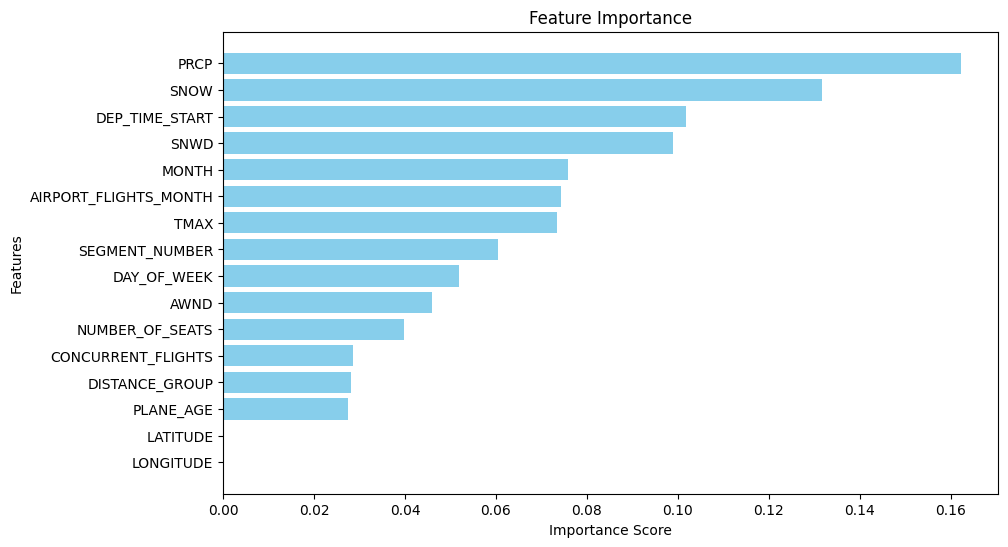

In [ ]:
# Extract feature importance
feature_importance = model.feature_importances_

# Map feature importance to feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

**Threshold vs Accuracy**

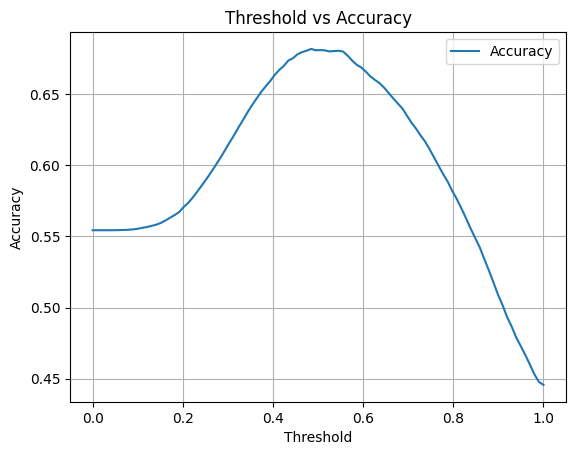

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Define thresholds
thresholds = np.linspace(0, 1, 100)

# Initialise lists to store metrics
accuracy_scores = []
f1_scores = []

# Compute metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# Plot Threshold vs Accuracy
plt.figure()
plt.plot(thresholds, accuracy_scores, label="Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Threshold vs Accuracy")
plt.legend()
plt.grid()
plt.show()

**Threshold vs F1 Score**

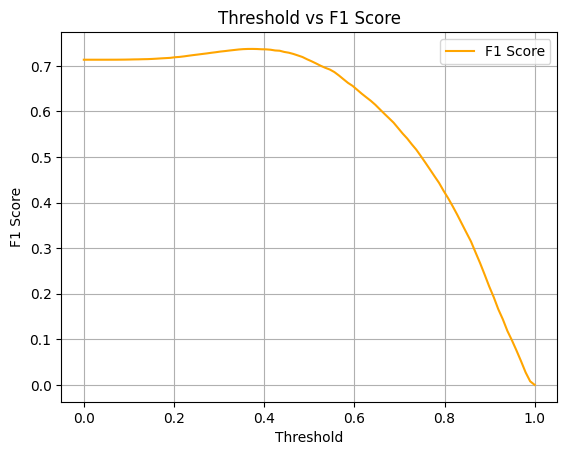

In [ ]:
# Plot Threshold vs F1 Score
plt.figure()
plt.plot(thresholds, f1_scores, label="F1 Score", color="orange")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Threshold vs F1 Score")
plt.legend()
plt.grid()
plt.show()

**ROC Curve**

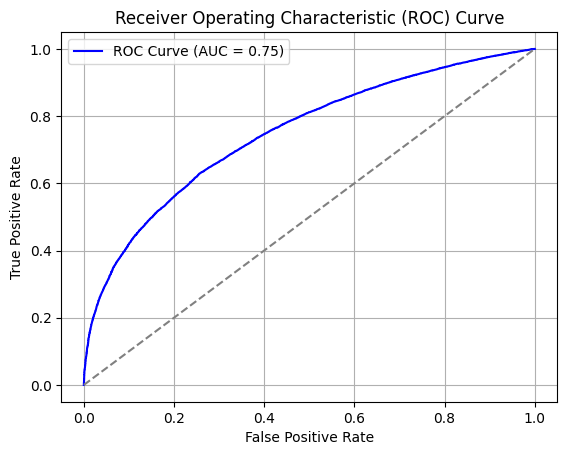

In [ ]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()